<a href="https://colab.research.google.com/github/kirsten-fung/project_voting/blob/main/voting_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/kirsten-fung/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 117 (delta 27), reused 23 (delta 20), pack-reused 80
Receiving objects: 100% (117/117), 33.93 MiB | 10.39 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Updating files: 100% (44/44), done.


In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# read in csv
nhgis = pd.read_csv('/content/project_voting/cleandf.csv')
va = pd.read_csv('/content/project_voting/data/voting_VA.csv')

In [4]:
# only look at virginia data in the country dataset
df = nhgis[nhgis['State Name'] == 'Virginia']
df.head()

,GIS Join Match Code,Data File Year,State Postal Abbreviation,State Name,State Code,County Name,County Code,Geographic Identifier,Area Name,Total,...,Built 2000 to 2004,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,Built 1950 to 1959,Built 1940 to 1949,Built 1939 or earlier,Median gross rent,Median value (dollars)
2817,G5100010,2006-2010,VA,Virginia,51,Accomack County,1,05000US51001,"Accomack County, Virginia",34066,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
2818,G5100030,2006-2010,VA,Virginia,51,Albemarle County,3,05000US51003,"Albemarle County, Virginia",96633,...,5830,10158,7375,6827,3092,2070,816,3053,1031.0,349800
2819,G5100050,2006-2010,VA,Virginia,51,Alleghany County,5,05000US51005,"Alleghany County, Virginia",16406,...,196,944,736,1478,1182,844,687,1849,504.0,104000
2820,G5100070,2006-2010,VA,Virginia,51,Amelia County,7,05000US51007,"Amelia County, Virginia",12517,...,739,1173,839,1010,483,317,301,322,672.0,189800
2821,G5100090,2006-2010,VA,Virginia,51,Amherst County,9,05000US51009,"Amherst County, Virginia",32315,...,704,2476,2409,2847,1599,1460,592,1454,582.0,142200


In [5]:
# group variables
df['Other'] = df['Some other race alone'] + df['Two or more races']
df['Male Higher Education'] = df["Male: Associate's degree"] + df["Male: Bachelor's degree"] + df["Male: Master's degree"] + df["Male: Doctorate degree"] + df["Male: Professional school degree"]
df['Female Higher Education'] = df["Female: Associate's degree"] + df["Female: Bachelor's degree"] + df["Female: Master's degree"] + df["Female: Doctorate degree"] + df["Female: Professional school degree"]
df['Male Highschool Equivalent'] = df['Male: High school graduate, GED, or alternative'] + df['Male: Some college, less than 1 year']
df['Female Highschool Equivalent'] = df['Female: High school graduate, GED, or alternative'] + df['Female: Some college, less than 1 year']

<ipython-input-5-845c701cb365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Other'] = df['Some other race alone'] + df['Two or more races']
<ipython-input-5-845c701cb365>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Male Higher Education'] = df["Male: Associate's degree"] + df["Male: Bachelor's degree"] + df["Male: Master's degree"] + df["Male: Doctorate degree"] + df["Male: Professional school degree"]
<ipython-input-5-845c701cb365>:4: SettingWithCopyWarning: 
A value is trying to be set on

In [6]:
# create new df for variables we want
df = df[['State Name','County Name','Male','Female','Median age: Male','Median age: Female','White alone','Black or African American alone','American Indian and Alaska Native alone','Asian alone','Native Hawaiian and Other Pacific Islander alone','Hispanic or Latino','Other','Male Higher Education','Female Higher Education','Male Highschool Equivalent','Female Highschool Equivalent','Median household income in the past 12 months (in 2010 inflation-adjusted dollars)']]
df.head()

,State Name,County Name,Male,Female,Median age: Male,Median age: Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Hispanic or Latino,Other,Male Higher Education,Female Higher Education,Male Highschool Equivalent,Female Highschool Equivalent,Median household income in the past 12 months (in 2010 inflation-adjusted dollars)
2817,Virginia,Accomack County,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372
2818,Virginia,Albemarle County,46330,50303,36.3,38.9,79493,9563,168,4146,28,4790,3235,16690,19230,6851,8238,64847
2819,Virginia,Alleghany County,8072,8334,43.2,46.0,15250,979,3,81,0,72,93,1049,1857,2735,2571,43160
2820,Virginia,Amelia County,6153,6364,40.6,42.7,9228,2954,31,47,18,292,239,727,847,1885,2062,50135
2821,Virginia,Amherst County,15347,16968,39.9,42.2,24762,6201,301,149,0,675,902,2077,2842,4189,5046,44757


In [7]:
# correlation matrix
X_country = df.loc[:, ['Male','Female','Median age: Male','Median age: Female','White alone','Black or African American alone','American Indian and Alaska Native alone','Asian alone','Native Hawaiian and Other Pacific Islander alone','Hispanic or Latino','Other','Male Higher Education','Female Higher Education','Male Highschool Equivalent','Female Highschool Equivalent','Median household income in the past 12 months (in 2010 inflation-adjusted dollars)'] ]
X_country.corr()

,Male,Female,Median age: Male,Median age: Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Hispanic or Latino,Other,Male Higher Education,Female Higher Education,Male Highschool Equivalent,Female Highschool Equivalent,Median household income in the past 12 months (in 2010 inflation-adjusted dollars)
Male,1.000000,0.999167,-0.266315,-0.283764,0.990295,0.760742,0.944193,0.902761,0.877359,0.931605,0.937869,0.964377,0.974902,0.929523,0.954476,0.444397
Female,0.999167,1.000000,-0.267448,-0.286538,0.989872,0.768926,0.941555,0.897345,0.869574,0.925150,0.931900,0.962098,0.973987,0.931568,0.958326,0.441165
Median age: Male,-0.266315,-0.267448,1.000000,0.908633,-0.240930,-0.366888,-0.201822,-0.137141,-0.308032,-0.209248,-0.235959,-0.197393,-0.207648,-0.278897,-0.272990,-0.109875
Median age: Female,-0.283764,-0.286538,0.908633,1.000000,-0.268707,-0.342245,-0.220597,-0.156119,-0.319306,-0.237396,-0.263413,-0.225266,-0.233731,-0.284612,-0.283122,-0.212155
White alone,0.990295,0.989872,-0.240930,-0.268707,1.000000,0.689999,0.923344,0.899483,0.845875,0.916538,0.919313,0.962898,0.973064,0.917688,0.946670,0.464507
Black or African American alone,0.760742,0.768926,-0.366888,-0.342245,0.689999,1.000000,0.675408,0.487342,0.752481,0.584601,0.630128,0.609107,0.643442,0.861213,0.842134,0.229897
American Indian and Alaska Native alone,0.944193,0.941555,-0.201822,-0.220597,0.923344,0.675408,1.000000,0.931874,0.801474,0.936371,0.920816,0.954501,0.953868,0.816327,0.853167,0.404108
Asian alone,0.902761,0.897345,-0.137141,-0.156119,0.899483,0.487342,0.931874,1.000000,0.743337,0.944887,0.912544,0.970581,0.959475,0.698391,0.751112,0.394594
Native Hawaiian and Other Pacific Islander alone,0.877359,0.869574,-0.308032,-0.319306,0.845875,0.752481,0.801474,0.743337,1.000000,0.826085,0.845171,0.808135,0.819479,0.857469,0.853926,0.385498
Hispanic or Latino,0.931605,0.925150,-0.209248,-0.237396,0.916538,0.584601,0.936371,0.944887,0.826085,1.000000,0.991607,0.960125,0.951878,0.769395,0.811778,0.458439


In [8]:
def get_majority_party(df):
    result = []
    for year in df['year'].unique():
        for county in df[df['year'] == year]['county_name'].unique():
            max_votes = 0
            majority_party = ''
            for party in ['DEMOCRAT', 'REPUBLICAN', 'GREEN', 'OTHER']:
                votes = df[(df['year'] == year) & (df['county_name'] == county) & (df['party'] == party)]['candidatevotes'].sum()
                if votes > max_votes:
                    max_votes = votes
                    majority_party = party
            result.extend([majority_party] * len(df[(df['year'] == year) & (df['county_name'] == county)]))
    return result

# Add majority party to DataFrame
va['majority'] = get_majority_party(va)

print(va)

      Unnamed: 0  year     state state_po      county_name  county_fips  \
0          11161  2000  VIRGINIA       VA         ACCOMACK        51001   
1          11162  2000  VIRGINIA       VA         ACCOMACK        51001   
2          11163  2000  VIRGINIA       VA         ACCOMACK        51001   
3          11164  2000  VIRGINIA       VA         ACCOMACK        51001   
4          11165  2000  VIRGINIA       VA        ALBEMARLE        51003   
...          ...   ...       ...      ...              ...          ...   
3731       71966  2020  VIRGINIA       VA  WINCHESTER CITY        51840   
3732       71967  2020  VIRGINIA       VA  WINCHESTER CITY        51840   
3733       71968  2020  VIRGINIA       VA  WINCHESTER CITY        51840   
3734       71969  2020  VIRGINIA       VA  WINCHESTER CITY        51840   
3735       71970  2020  VIRGINIA       VA  WINCHESTER CITY        51840   

            office       candidate       party  candidatevotes  totalvotes  \
0     US PRESIDENT   

In [9]:
va_df = va[['year','county_name','majority']]
va_df.head(50)

,year,county_name,majority
0,2000,ACCOMACK,REPUBLICAN
1,2000,ACCOMACK,REPUBLICAN
2,2000,ACCOMACK,REPUBLICAN
3,2000,ACCOMACK,REPUBLICAN
4,2000,ALBEMARLE,REPUBLICAN
5,2000,ALBEMARLE,REPUBLICAN
6,2000,ALBEMARLE,REPUBLICAN
7,2000,ALBEMARLE,REPUBLICAN
8,2000,ALLEGHANY,REPUBLICAN
9,2000,ALLEGHANY,REPUBLICAN


In [10]:
# remove repeated counties
va_df = va_df.drop_duplicates(subset=['year', 'county_name', 'majority'])
va_df.head()

,year,county_name,majority
0,2000,ACCOMACK,REPUBLICAN
4,2000,ALBEMARLE,REPUBLICAN
8,2000,ALLEGHANY,REPUBLICAN
12,2000,AMELIA,REPUBLICAN
16,2000,AMHERST,REPUBLICAN


In [11]:
# reformat df
df['County Name'] = df['County Name'].str.replace(' County', '').str.upper()
df.rename(columns={'County Name': 'county_name'}, inplace=True)
df.head()

,State Name,county_name,Male,Female,Median age: Male,Median age: Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Hispanic or Latino,Other,Male Higher Education,Female Higher Education,Male Highschool Equivalent,Female Highschool Equivalent,Median household income in the past 12 months (in 2010 inflation-adjusted dollars)
2817,Virginia,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372
2818,Virginia,ALBEMARLE,46330,50303,36.3,38.9,79493,9563,168,4146,28,4790,3235,16690,19230,6851,8238,64847
2819,Virginia,ALLEGHANY,8072,8334,43.2,46.0,15250,979,3,81,0,72,93,1049,1857,2735,2571,43160
2820,Virginia,AMELIA,6153,6364,40.6,42.7,9228,2954,31,47,18,292,239,727,847,1885,2062,50135
2821,Virginia,AMHERST,15347,16968,39.9,42.2,24762,6201,301,149,0,675,902,2077,2842,4189,5046,44757


In [12]:
# merge based on 'county_name' to get the majority column into larger df
merged = pd.merge(df, va_df, on='county_name', how='inner')
merged.head(50)

,State Name,county_name,Male,Female,Median age: Male,Median age: Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Hispanic or Latino,Other,Male Higher Education,Female Higher Education,Male Highschool Equivalent,Female Highschool Equivalent,Median household income in the past 12 months (in 2010 inflation-adjusted dollars),year,majority
0,Virginia,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2000,REPUBLICAN
1,Virginia,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2004,REPUBLICAN
2,Virginia,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2008,REPUBLICAN
3,Virginia,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2012,REPUBLICAN
4,Virginia,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2016,REPUBLICAN
5,Virginia,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2020,REPUBLICAN
6,Virginia,ALBEMARLE,46330,50303,36.3,38.9,79493,9563,168,4146,28,4790,3235,16690,19230,6851,8238,64847,2000,REPUBLICAN
7,Virginia,ALBEMARLE,46330,50303,36.3,38.9,79493,9563,168,4146,28,4790,3235,16690,19230,6851,8238,64847,2004,DEMOCRAT
8,Virginia,ALBEMARLE,46330,50303,36.3,38.9,79493,9563,168,4146,28,4790,3235,16690,19230,6851,8238,64847,2008,DEMOCRAT
9,Virginia,ALBEMARLE,46330,50303,36.3,38.9,79493,9563,168,4146,28,4790,3235,16690,19230,6851,8238,64847,2012,DEMOCRAT


In [13]:
# reformat df
merged.rename(columns={'county_name': 'County Name','majority': 'Majority','year': 'Year'}, inplace=True)
merged.drop(columns=['State Name'], inplace=True)
merged.head()

,County Name,Male,Female,Median age: Male,Median age: Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Hispanic or Latino,Other,Male Higher Education,Female Higher Education,Male Highschool Equivalent,Female Highschool Equivalent,Median household income in the past 12 months (in 2010 inflation-adjusted dollars),Year,Majority
0,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2000,REPUBLICAN
1,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2004,REPUBLICAN
2,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2008,REPUBLICAN
3,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2012,REPUBLICAN
4,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2016,REPUBLICAN


In [14]:
# binned parties into numerical values for analysis
def map_to_binary(party):
    if party == 'DEMOCRAT':
        return 0
    elif party == 'REPUBLICAN':
        return 1
    else:
        return 2

merged['Majority_Bin'] = merged['Majority'].apply(map_to_binary)
merged.head()

,County Name,Male,Female,Median age: Male,Median age: Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Hispanic or Latino,Other,Male Higher Education,Female Higher Education,Male Highschool Equivalent,Female Highschool Equivalent,Median household income in the past 12 months (in 2010 inflation-adjusted dollars),Year,Majority,Majority_Bin
0,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2000,REPUBLICAN,1
1,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2004,REPUBLICAN,1
2,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2008,REPUBLICAN,1
3,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2012,REPUBLICAN,1
4,ACCOMACK,16707,17359,41.5,45.8,22639,9729,30,166,0,2732,1502,2622,3077,5080,5103,41372,2016,REPUBLICAN,1


In [15]:
from sklearn.preprocessing import PolynomialFeatures

# i removed median age
numeric_features = ['Male', 'Female',
                    'White alone', 'Black or African American alone',
                    'American Indian and Alaska Native alone', 'Asian alone',
                    'Native Hawaiian and Other Pacific Islander alone',
                    'Hispanic or Latino', 'Majority_Bin']

features = merged[numeric_features]

# polynomial expansion
poly = PolynomialFeatures(degree=2, include_bias=False)
expanded_features = poly.fit_transform(features)
expanded_feature_names = poly.get_feature_names_out(numeric_features)

# create a df with expanded features
df_expanded = pd.DataFrame(expanded_features, columns=expanded_feature_names)

# concatenate expanded features with the original dataset
merged_expanded = pd.concat([merged, df_expanded], axis=1)
# print(merged_expanded.columns)
# print(merged_expanded.head())

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# our target variable
y = merged_expanded['Majority_Bin']
X = merged_expanded.drop(columns=['Majority_Bin', 'Majority',
                                              'County Name', 'Year'])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                      random_state=100)
# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("mean squared error:", mse)

# because of how small this is we can safely assume that its due to overfitting lol

mean squared error: 1.5424079975077846e-20


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


y = merged_expanded['Majority_Bin']
X = merged_expanded.drop(columns=['Majority_Bin', 'Majority',
                                            'County Name', 'Year'])
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                      random_state=100)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("mean squared error:", mse)
# this looks pretty good to me?

mean squared error: 0.010970444873329368


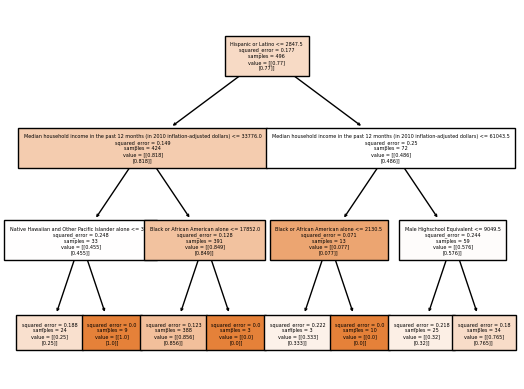

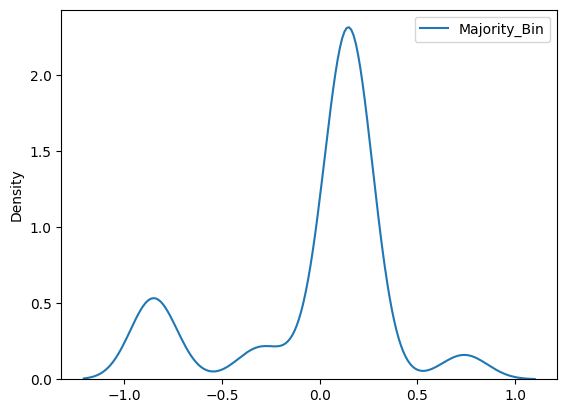

Rsq:  Majority_Bin    0.144359
Majority_Bin    0.144359
dtype: float64 

RMSE:  0.40441862861813666 



In [50]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

# Process data:
y = merged_expanded['Majority_Bin']
#y =  np.log(df['Price']) # Compare with and without logs
vars = ['Male', 'Female', 'Median age: Male', 'Median age: Female', 'White alone', 'Black or African American alone', 'American Indian and Alaska Native alone', 'Asian alone', 'Native Hawaiian and Other Pacific Islander alone', 'Hispanic or Latino', 'Other', 'Male Higher Education', 'Female Higher Education', 'Male Highschool Equivalent', 'Male Highschool Equivalent', 'Median household income in the past 12 months (in 2010 inflation-adjusted dollars)']
X = pd.concat([merged_expanded.loc[:,vars]],axis=1)

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

# Fit decision tree:
cart = DecisionTreeRegressor(max_depth = 3) # Create a regression object
cart = cart.fit(X_train, y_train) # Fit the regression
var_names = cart.feature_names_in_

# Visualize results:
plot_tree(cart,filled=True,feature_names=var_names, fontsize=3.5)
plt.show()

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Residuals, Rsq, RMSE
e = y_test - y_hat
sns.kdeplot(e) # Notice the residuals aren't centered around zero
plt.show()
rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')

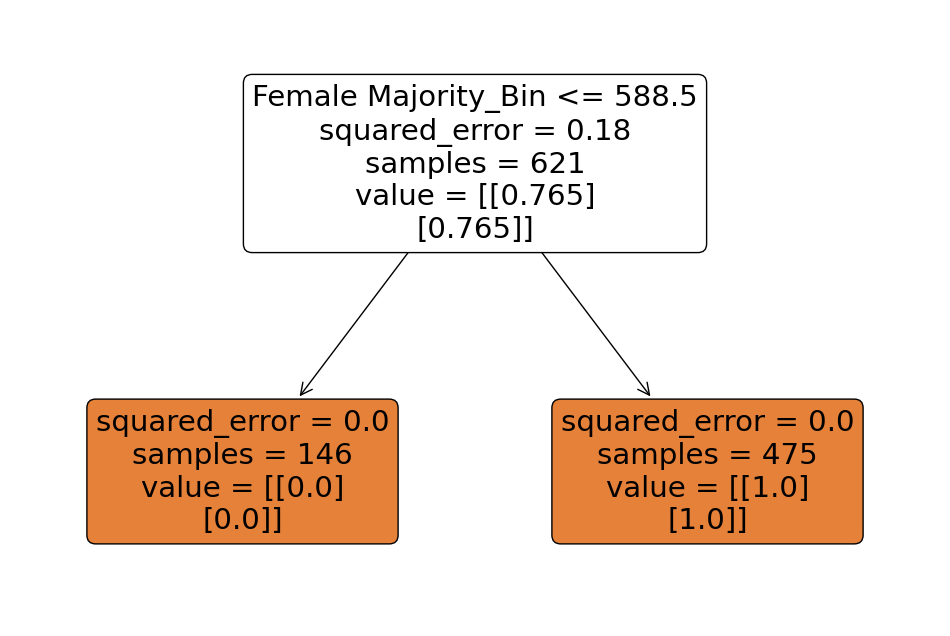

In [32]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt


y = merged_expanded['Majority_Bin']
X = merged_expanded.drop(columns=['Majority_Bin', 'Majority',
                                            'County Name','Year'])

decision_tree = DecisionTreeRegressor(max_depth=1, random_state=42)
decision_tree.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()
# This is cool so basically when the number of females in a particular group
# is less than or equal to 588.5, the majority party affiliation is democratic

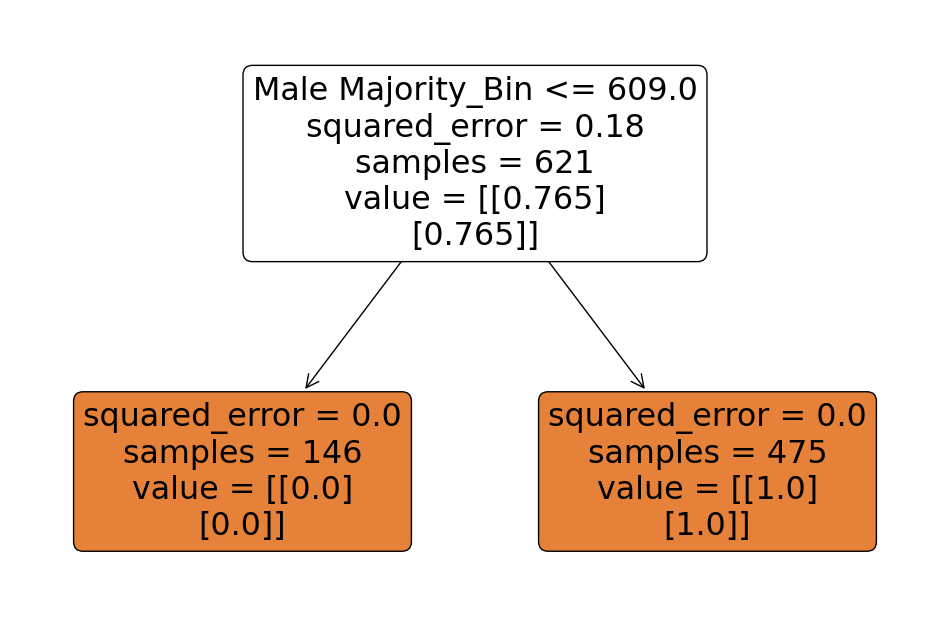

In [31]:
y = merged_expanded['Majority_Bin']
X = merged_expanded.drop(columns=['Majority_Bin', 'Majority',
                                            'County Name','Year'])

decision_tree = DecisionTreeRegressor(max_depth=1, random_state=0)
decision_tree.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()
# when the number of males in a particular group
# is less than or equal to 609, the majority party affiliation is democratic

[Text(0.5, 0.75, 'x[68] <= 0.5\ngini = 0.36\nsamples = 621\nvalue = [146, 475]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 146\nvalue = [146, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 475\nvalue = [0, 475]')]

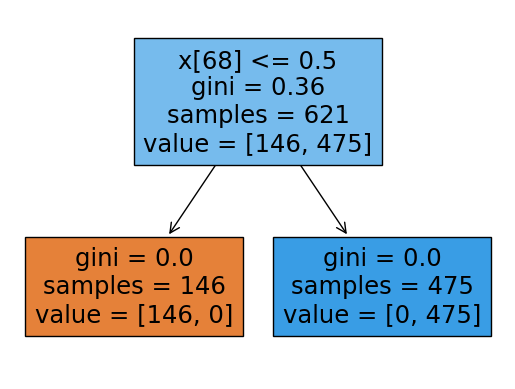

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

y = merged_expanded['Majority']
X = merged_expanded.drop(columns=['Majority_Bin', 'Majority',
                                            'County Name','Year'])

cart = DecisionTreeClassifier()
cart = cart.fit(X, y)

plot_tree(cart,filled=True)

In [21]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

y = merged_expanded['Majority_Bin']
X = merged_expanded.drop(columns=['Majority_Bin', 'Majority',
                                            'County Name','Year'])
X_scaled = X.apply(maxmin)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,
                                                    test_size=.2,
                                                    random_state=100)

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
rf = model.fit(X_train,y_train)
y_hat_rf = rf.predict(X_test)

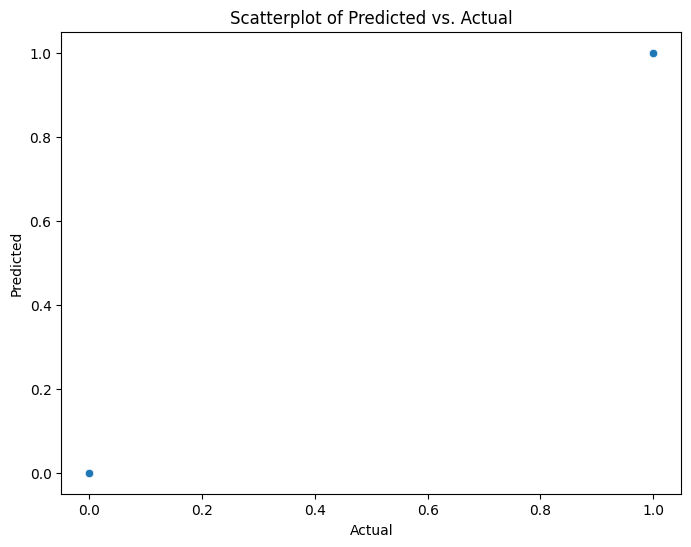

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape y_test and y_hat_rf to be 1-dimensional arrays
y_test_1d = y_test.values.flatten()
y_hat_rf_1d = y_hat_rf.flatten()

# Scatterplot of predicted v. actual:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_1d, y=y_hat_rf_1d)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatterplot of Predicted vs. Actual")
plt.show()

# this basically tells us that our predictions are lining up very close to
# exactly what we want

<ipython-input-29-7a7b2164dc03>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(residual)


<Axes: ylabel='Density'>

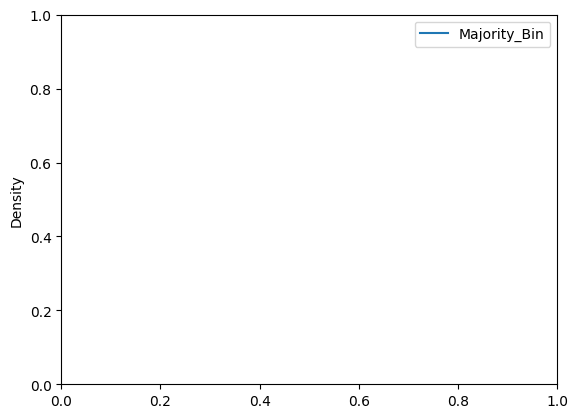

In [29]:
# Residual plot:
residual = y_test - y_hat_rf
sns.kdeplot(residual)
# basically confirming that our models are very close to our predictions

In [25]:
rf.score(X_test,y_test) # Rsq measure
# the model perfectly predicts the target variable for all observations in the test
# this is prob due to overfiting again

1.0

<Figure size 1000x600 with 0 Axes>

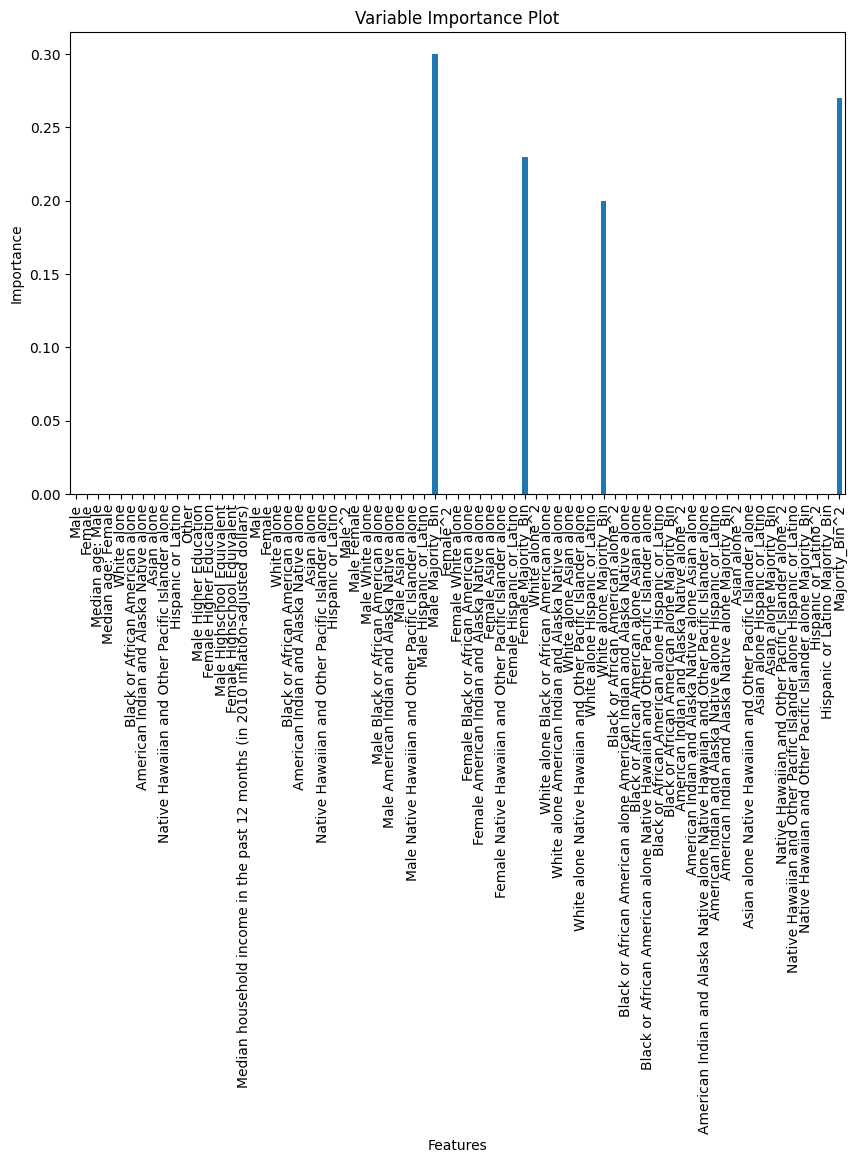

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
forest_importances.plot.bar()

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Importance Plot')
plt.show()

# this is valid because we set our target variable to Majority Bin but it is intresting to see why White Majority Bin is so high?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


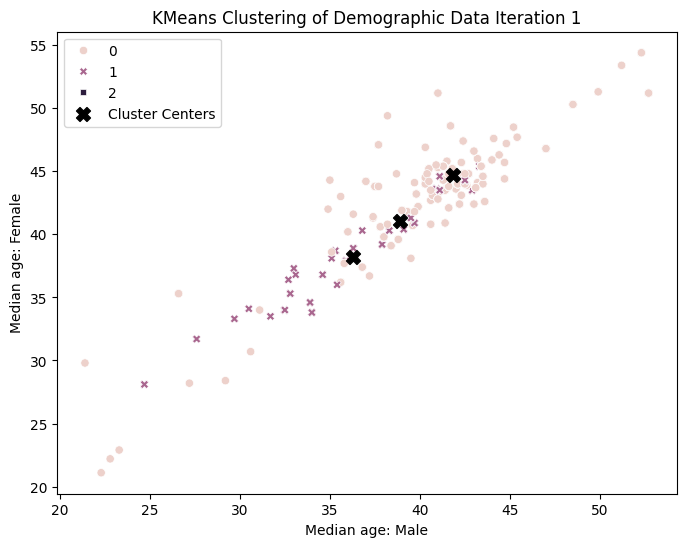

In [27]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# relevant features
X = merged[['Male','Female','Median age: Male','Median age: Female',
        'White alone','Black or African American alone','American Indian and Alaska Native alone',
        'Asian alone','Native Hawaiian and Other Pacific Islander alone','Hispanic or Latino','Other',
        'Male Higher Education','Female Higher Education','Male Highschool Equivalent',
        'Female Highschool Equivalent','Median household income in the past 12 months (in 2010 inflation-adjusted dollars)']]

initial_centroids = np.random.randint(low=1, high=24, size=3)
model = KMeans(n_clusters=3, max_iter=1, init=X.iloc[initial_centroids, :], random_state=0)
model = model.fit(X)
merged['cluster'] = model.predict(X)

centers = model.cluster_centers_
min_values = X.min(axis=0)
max_values = X.max(axis=0)
diff_values = max_values - min_values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged, x='Median age: Male', y='Median age: Female', hue='cluster', style='cluster')
plt.scatter(centers[:, 2], centers[:, 3], marker='X', s=100, c='black', label='Cluster Centers')
plt.title('KMeans Clustering of Demographic Data Iteration 1')
plt.xlabel('Median age: Male')
plt.ylabel('Median age: Female')
plt.legend()
plt.show()

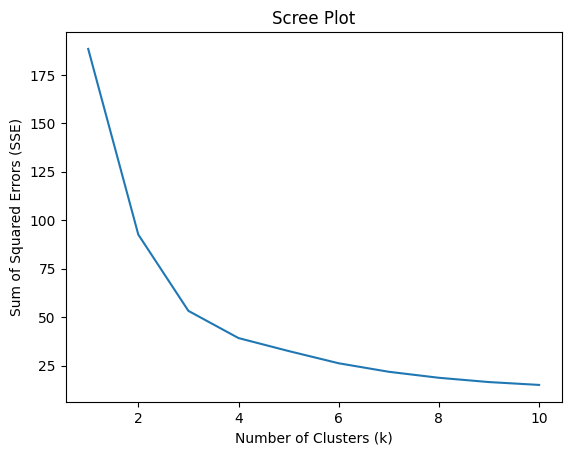

In [28]:
def maxmin(x):
    x = (x - min(x)) / (max(x) - min(x))
    return x

X = merged[['Male','Female','Median age: Male','Median age: Female',
        'White alone','Black or African American alone','American Indian and Alaska Native alone',
        'Asian alone','Native Hawaiian and Other Pacific Islander alone','Hispanic or Latino','Other',
        'Male Higher Education','Female Higher Education','Male Highschool Equivalent',
        'Female Highschool Equivalent','Median household income in the past 12 months (in 2010 inflation-adjusted dollars)']]
X = X.apply(maxmin)

k_bar = 10
k_grid = np.arange(1, k_bar + 1)

SSE = np.zeros(k_bar)

for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()